## Importar librerias necesarias

In [261]:
import pandas as pd # Manipular dataframe
import numpy as np # Analisis de datos
import matplotlib.pyplot as plt # Gráficos 2D
import seaborn as sns # Crea gráficos estadisticos
from sklearn.cluster import KMeans # Libreria de aprendizaje K-means
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [263]:
dataset = pd.read_csv('./Mall_Customers.csv')
dataset.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## 1. Analisis exploratorio EDA 

In [266]:
dataset.info() #Información general del DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [268]:
dataset.describe() # Estadisdica descriptiva

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


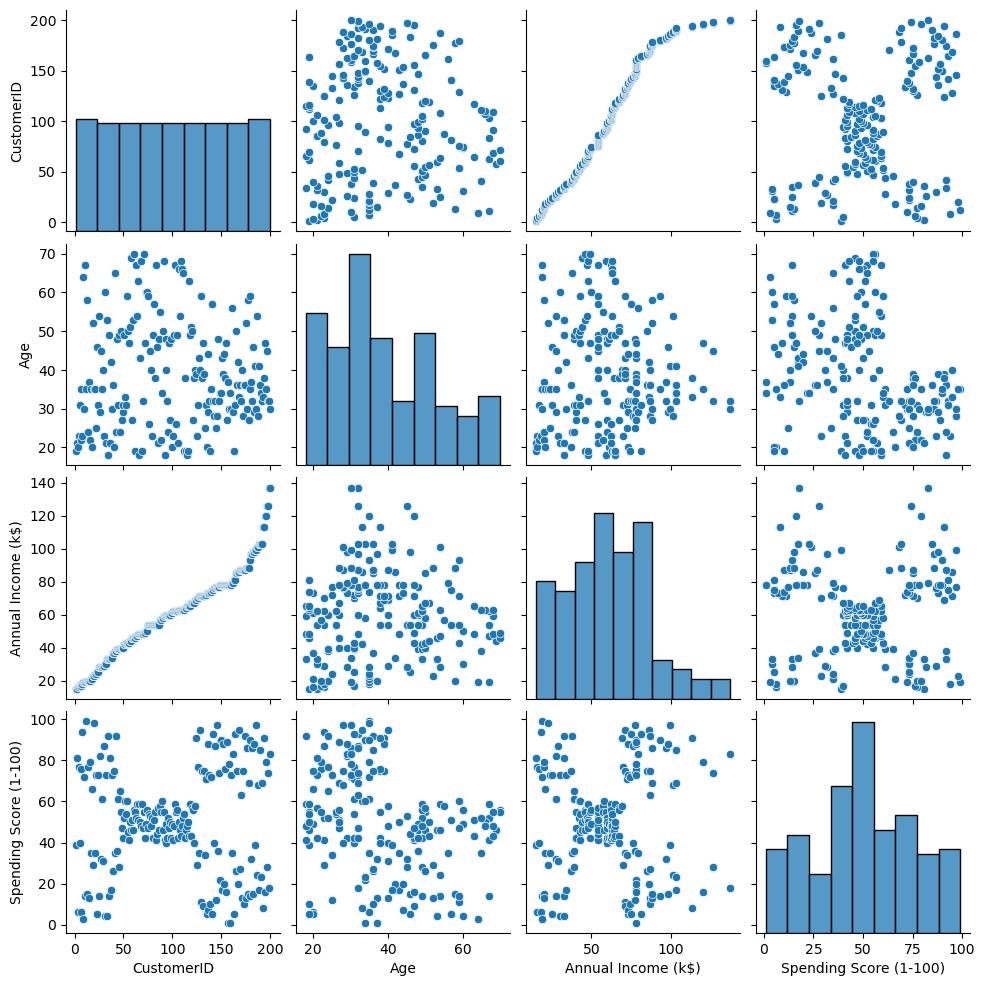

In [270]:
sns.pairplot(dataset) # Visualización de correlaciones
plt.show()

In [271]:
dataset.columns = ['Customer_ID','Gender','Age','Annual_Income','Spending_Score'] #Cambiar los monbre de las columnas Header
pd.DataFrame(dataset)

,Customer_ID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [115]:
data=dataset.drop(['Gender'], axis=1) #Elimina columnas innecesarias
data.head()

,Customer_ID,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [274]:
corr_matrix = data.corr()
corr_matrix

,Customer_ID,Age,Annual_Income,Spending_Score
Customer_ID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_Income,0.977548,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.327227,0.009903,1.000000


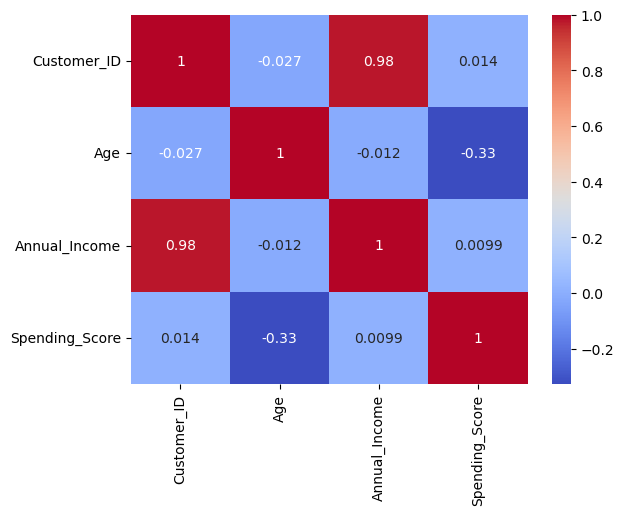

In [276]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: >

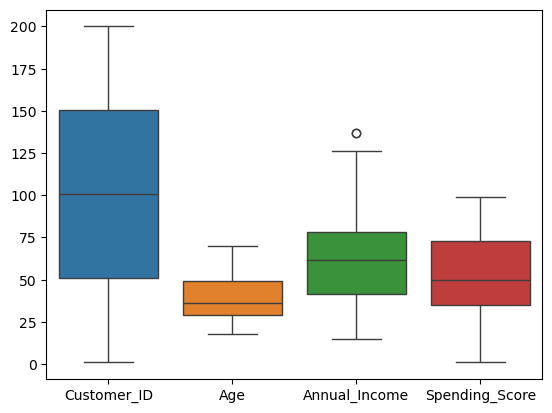

In [278]:
sns.boxplot(data=dataset)

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [281]:
dataset.isnull().sum() #Revision de valores nulos

Customer_ID       0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [283]:
dataset['Gender'] = dataset['Gender'].map({'Male':0, 'Female':1}) # Especificar o convertir variables de string a númericos
dataset

,Customer_ID,Gender,Age,Annual_Income,Spending_Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [286]:
X = dataset[['Age','Annual_Income','Spending_Score']] #Selección de variables
X

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [288]:
# Reducir 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

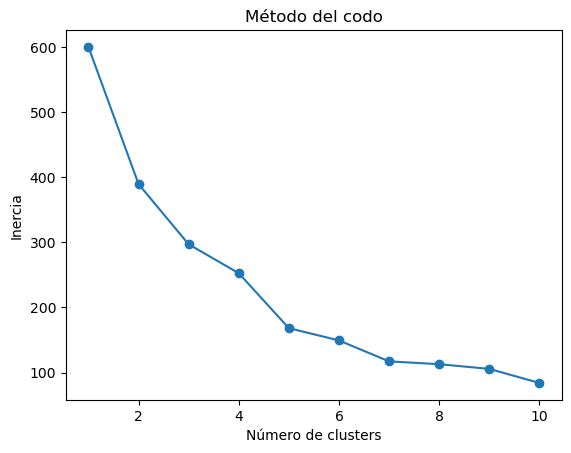

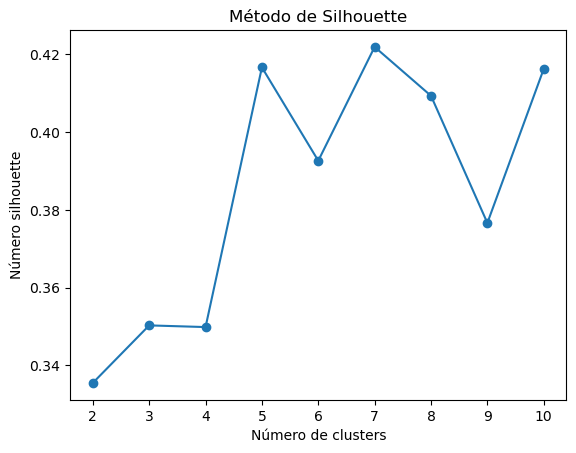

In [290]:
#Determinar el cluster optimo
inertia = [] # Metodo del codo
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

#Método de Silhoutte
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Número silhouette')
plt.title('Método de Silhouette')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros.

In [292]:
kmeans = KMeans(n_clusters=5, random_state=0) #Se selecciona el número de clusters 
kmeans.fit(X_scaled)
dataset['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids

array([[ 1.20484056, -0.23577338, -0.05236781],
       [ 0.07333084,  0.97494509, -1.19729675],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 0.5310735 , -1.2905084 , -1.23646671],
       [-0.98067852, -0.74305983,  0.46744035]])

In [295]:
labels = kmeans.labels_
C = kmeans.cluster_centers_
colores=['red','green','black','gray','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [298]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f'Puntaje de Silhouette: {sil_score}') #Coeficiente de Silhouette

ch_score = calinski_harabasz_score(X_scaled, kmeans.labels_)
print(f'Índice de Calinski-Harabasz: {ch_score}')

print(f'Inertia (Suma de cuadrados de los clusters): {kmeans.inertia_}')

print(f'Índice de Davies-Bouldin: {metrics.davies_bouldin_score(X, labels)}')

Puntaje de Silhouette: 0.41664341513732767
Índice de Calinski-Harabasz: 125.10094020060956
Inertia (Suma de cuadrados de los clusters): 168.24758017556834
Índice de Davies-Bouldin: 0.8578428996954613


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

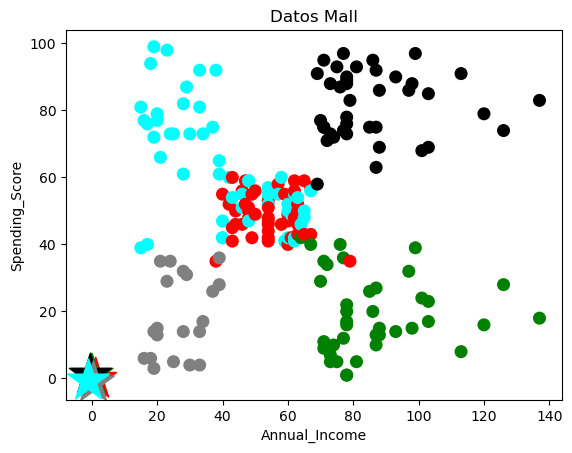

In [301]:
f1 = X['Annual_Income'].values
f2 = X['Spending_Score'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0],C[:,1], marker='*', c=colores, s=1000)
plt.title('Datos Mall')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

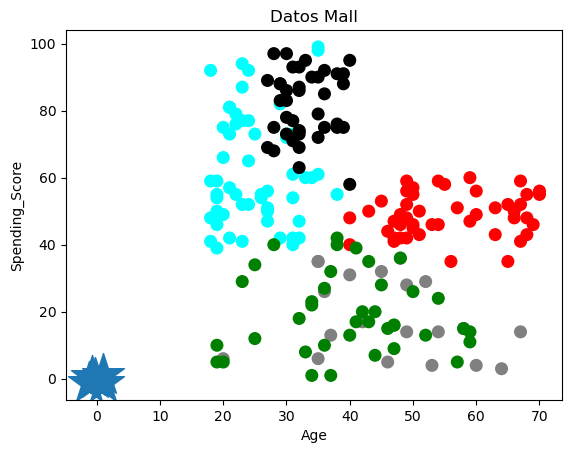

In [303]:
f1 = X['Age'].values
f2 = X['Spending_Score'].values
plt.scatter(f1,f2,c=asignar,s=70)
plt.scatter(C[:,1],C[:,2], marker='*', s=1000)
plt.title('Datos Mall')
plt.xlabel('Age')
plt.ylabel('Spending_Score')
plt.show()

In [307]:
print("""
En estos gráficos podemos observar como se agrupan los clientes en función de sus ingresos
Clusters de alto ingreso: Representan clientes con un alto poder adquisitivo e inclinarse a gastar más de su dinero
Clusters de bajo ingreso y alto gasto: Representan una población joven que gastan más que la entrada de sus ingresos
clusters de bajo ingreso y bajos gasto: Son los clientes que limitan su presupuesto
""")


En estos gráficos podemos observar como se agrupan los clientes en función de sus ingresos
Clusters de alto ingreso: Representan clientes con un alto poder adquisitivo e inclinarse a gastar más de su dinero
Clusters de bajo ingreso y alto gasto: Representan una población joven que gastan más que la entrada de sus ingresos
clusters de bajo ingreso y bajos gasto: Son los clientes que limitan su presupuesto

